Continuous-time model
---

Let's order the infection times $t_{\pi_{1}}<t_{\pi_{2}}<\dots<t_{\pi_{N}}$
. Let $\lambda_{i}\left(t\right)$ be a time-dependent transmission
rate and $L_{i}\left(t\right)=\int_{0}^{t}\lambda_{ij}\left(s\right)ds$
its primitive. Then $\rho_{i}\left(t_i; t_j\right)=\lambda_{i}\left(t_i\right)e^{-\int_{t_j}^{t_i}\lambda_{i}\left(s\right)ds} = \lambda_{i}\left(t_j\right)e^{L_{i}(t_j) - L_{i}(t_i) }$
will be the transmission ``delay'' density distribution. 

\begin{align*}p\left(t_{1},\dots,t_{N}\right) & =\prod_{i=1}^{N}\lim_{ds\to0^{+}}\frac{\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}-\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}}{ds}\\
 & =\prod_{i=1}^{N}\frac{d}{ds}_{|s=0}\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}\\
 & =\prod_{i=1}^{N}\left\{ \left(\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}\right)\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right\} \\
\mathcal{L}_{0}\left(t_{1},\dots,t_{N}\right) & =\log p\left(t_{1},\dots,t_{N}\right)\\
 & =-\sum_{i=1}^{N}\left\{ \sum_{j\in\partial i:t_{j}<t_{i}}\left(L_{i}(t_{i})-L_{i}(t_{j})\right)-\log\left(\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right)\right\} 
\end{align*}

Note that $$\int_{t_j}^{t_i} \rho_{i}(s; t_j) ds = 1-e^{-\left(L_{i}(t_i) - L_{i}(t_j)\right)}$$ so $$\lambda_{i}(t) = -\frac{d}{dt}\log \left(1-\int_{t_j}^{t_i} \rho_{i}(s) ds\right)$$


\begin{align}\lambda(t) & =ae^{-\left(\frac{t-b}{c}\right)^{2}}\\
\frac{x-b}{c} & =\frac{y}{\sqrt{2}}\\
dx & =\frac{c}{\sqrt{2}}dy\\
L(t)=\int_{0}^{t}ae^{-\left(\frac{x-b}{c}\right)^{2}}dx & = ac\int_{\frac{0-b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =ac\sqrt{\pi}\frac{1}{\sqrt{\pi}}\int_{-\frac{b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =\frac{ac\sqrt{\pi}}{2}\left(\mathrm{erfc}\left(-\frac{t-b}{c}\right)-\mathrm{erfc}\left(\frac{b}{c}\right)\right)\\
\rho_{i}\left(t_{i};t_{j}\right) & =\lambda_{i}\left(t_{i}\right)e^{-\int_{t_{j}}^{t_{i}}\lambda_{i}\left(s\right)ds}=\lambda_{i}\left(t_{i}\right)e^{L_{i}(t_{j})-L_{i}(t_{i})}\\
\frac{d}{ds}-e^{L_{i}(t_{j})-L_{i}(s)} & =\lambda\left(s\right)e^{L_{i}(t_{j})-L_{i}(s)}=\rho_{i}\left(s;t_{j}\right)\\
\end{align}

Sampling 
---
\begin{align}
\int_{t_{j}}^{t}\rho(s;t_{j})ds & =1-e^{L_{i}(t_{j})-L_{i}(t)}=1-r\sim U(0,1)\\
e^{L_{i}(t_{j})-L_{i}(t)} & =r\\
L_{i}(t) & =L_{i}\left(t_{j}\right)-\log(r)\\
\mathrm{erfc}\left(-\frac{t-b}{c}\right) & =\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\\
t & =-c\,\mathrm{ierfc}\left(\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\right)+b
\end{align}

In [79]:
using Causality
using IntervalUnionArithmetic

In [80]:
using SparseArrays, LinearAlgebra
T, N = 20.0, 50
ρ = 3/N
G = Causality.makeGNP(N,ρ)

Causality.SparseMatrixDiGraph{Int64}(sparse([22, 33, 47, 50, 17, 39, 46, 20, 27, 38  …  27, 34, 35, 41, 43, 9, 23, 26, 31, 2], [1, 2, 2, 2, 3, 3, 3, 4, 4, 4  …  48, 48, 48, 48, 48, 49, 49, 49, 49, 50], [π, π, π, π, π, π, π, π, π, π  …  π, π, π, π, π, π, π, π, π, π], 50, 50), sparse([22, 33, 47, 50, 17, 39, 46, 20, 27, 38  …  27, 34, 35, 41, 43, 9, 23, 26, 31, 2], [1, 2, 2, 2, 3, 3, 3, 4, 4, 4  …  48, 48, 48, 48, 48, 49, 49, 49, 49, 50], [59, 88, 137, 152, 49, 108, 133, 57, 69, 106  …  71, 95, 98, 121, 127, 29, 61, 68, 82, 4], 50, 50))

In [81]:
getpargen(inf_out::GaussianRate, lat_gen::GaussianRate, rec_gen::GaussianRate) = 
    [inf_out.a inf_out.b inf_out.c lat_gen.a lat_gen.b lat_gen.c rec_gen.a rec_gen.b rec_gen.c]


getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate, latency::GaussianRate, recov::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
     fill(latency.a, 1, N); fill(latency.b, 1, N); fill(latency.c, 1, N);
     fill(recov.a, 1, N); fill(recov.b, 1, N); fill(recov.c, 1, N)
    ]

getpar (generic function with 1 method)

In [82]:
#Initialize generation parameters
ε = 1e-10
λ = 0.6
pseed = 1/N 
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
latency = GaussianRate(1., T/2, 1/ε)
recov = GaussianRate(1., T/2, 1/ε)

inf_out = GaussianRate(λ, 4., 3.)
l_delay = GaussianRate(0.8, 2., 3.)
r_delay = GaussianRate(0.1, 6., 4.)

θp = getpar(pseed, autoinf, inf_in, latency, recov);
θpgen = getpargen(inf_out, l_delay, r_delay);

In [83]:
θpgen

1×9 Matrix{Float64}:
 0.6  4.0  3.0  0.8  2.0  3.0  0.1  6.0  4.0

In [108]:
#Initialize min/max boundaies
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min, rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max, rate_max, rate_max);

rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(3.  ,  T,   T)

θgenmin = getpargen(rate_min, rate_min, rate_min);
θgenmax = getpargen(rate_max, rate_max, rate_max);

In [109]:
const I = IndividualSEIR{GaussianRate,GaussianRate,GaussianRate,GaussianRate,GaussianRate,GaussianRate,GaussianRate}

IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}

In [110]:
Mp = StochasticModel(I, T, θp, G, θpgen);
sample! = Sampler(Mp);

In [143]:
xtrue = zeros(N,3)
sample!(xtrue)
nobs, p = 30, 1e-6
O = [(ti = T*(1+rand())/2; (i,xtrue[i,2] < ti < xtrue[i,3],ti,p)) for i=1:nobs]

30-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 0, 14.059674975983762, 1.0e-6)
 (2, 0, 16.841851035580536, 1.0e-6)
 (3, 0, 16.401567692420294, 1.0e-6)
 (4, 0, 14.10465713993634, 1.0e-6)
 (5, 0, 15.633175166260862, 1.0e-6)
 (6, 0, 10.463547790010946, 1.0e-6)
 (7, 0, 15.739565060989825, 1.0e-6)
 (8, 0, 14.405794393662942, 1.0e-6)
 (9, 0, 11.216352392641811, 1.0e-6)
 (10, 0, 11.606191636213627, 1.0e-6)
 (11, 0, 17.088552422034162, 1.0e-6)
 (12, 0, 14.103380202812875, 1.0e-6)
 (13, 0, 14.7081827616715, 1.0e-6)
 ⋮
 (19, 0, 14.145407044936519, 1.0e-6)
 (20, 0, 10.22822385424092, 1.0e-6)
 (21, 0, 12.263838695134384, 1.0e-6)
 (22, 0, 11.404257549913499, 1.0e-6)
 (23, 0, 14.823874275863155, 1.0e-6)
 (24, 0, 16.66196486972587, 1.0e-6)
 (25, 0, 17.218398279370447, 1.0e-6)
 (26, 0, 17.475309135150855, 1.0e-6)
 (27, 0, 18.72500667691256, 1.0e-6)
 (28, 0, 11.535359821154783, 1.0e-6)
 (29, 0, 15.07216407691458, 1.0e-6)
 (30, 0, 16.94830268934863, 1.0e-6)

In [112]:
xtrue

50×3 Matrix{Float64}:
 20.0      20.0      20.0
 12.6457   13.7672   20.0
 11.4524   11.5522   20.0
  7.28348   7.65719  11.3895
 12.4975   12.9282   20.0
 11.2937   13.5829   20.0
 16.7265   17.0561   20.0
 20.0      20.0      20.0
 14.4365   14.6973   18.5974
 18.2386   20.0      20.0
 19.9023   20.0      20.0
 16.1988   16.9652   20.0
 10.9298   12.0058   20.0
  ⋮                  
  8.79143   8.99993  20.0
 10.4764   10.8178   18.0076
 17.5018   19.4705   20.0
  9.79986  10.5769   20.0
 14.1332   16.2669   20.0
 17.2152   19.4673   20.0
 15.1718   16.5877   20.0
 14.1382   14.2828   20.0
  8.17041   9.16151  20.0
 13.3128   14.6817   20.0
 14.8999   14.9404   16.554
 16.014    16.5647   20.0

In [130]:
#Initialize softened model
T = Float64(T)
ε = 2e-3

inf_out = GaussianRate(0.1, 7., 6.)
l_delay = GaussianRate(1/2, 7., 5.)
r_delay = GaussianRate(1/2, 4., 4.)

autoinf = GaussianRate(ε, T/2, 1/ε)

θp2gen = getpargen(inf_out, l_delay, r_delay);
θp2 = getpar(pseed, autoinf, inf_in, latency, recov);
Mp2 = StochasticModel(I, T, θp2, G, θpgen);

In [131]:
θpgen

1×9 Matrix{Float64}:
 0.6  4.0  3.0  0.8  2.0  3.0  0.1  6.0  4.0

In [132]:
#Initialize the parameters to learn

autoinf = GaussianRate(1/N, T/2, 2T)
inf_in = GaussianRate(1.0, T/2, 2T)
latency = GaussianRate(1., T/2, 2T)
recov = GaussianRate(1., T/2, 2T)


θ = getpar(pseed, autoinf, inf_in,  latency, recov);
M = StochasticModel(I, T, θ, G, θpgen);

In [134]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
#descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
 #        θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1));
descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.03));

Progress:  65%|██████████████████████████▋              |  ETA: 0:00:12
  F:  48.9987932203308

LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
      [1] [0m[1mreshape[22m
    [90m    @ [39m[90m./[39m[90m[4mreshapedarray.jl:51[24m[39m[90m [inlined][39m
      [2] [0m[1mreshape[22m
    [90m    @ [39m[90m./[39m[90m[4mreshapedarray.jl:111[24m[39m[90m [inlined][39m
      [3] [0m[1mreshape[22m
    [90m    @ [39m[90m./[39m[90m[4mreshapedarray.jl:141[24m[39m[90m [inlined][39m
      [4] [0m[1m_maybe_reshape_parent[22m
    [90m    @ [39m[90m./[39m[90m[4msubarray.jl:124[24m[39m[90m [inlined][39m
      [5] [0m[1mview[22m
    [90m    @ [39m[90m./[39m[90m[4msubarray.jl:178[24m[39m[90m [inlined][39m
      [6] [0m[1mmaybeview[22m
    [90m    @ [39m[90m./[39m[90m[4mviews.jl:146[24m[39m[90m [inlined][39m
      [7] ([0m[1mIndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}[22m)[0m[1m([22m[90mθi[39m::[0mVector[90m{ForwardDiff.Dual{ForwardDiff.Tag{Causality.var"#31#32"{Matrix{Float64}, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Int64}, Float64}, Float64, 7}}[39m, [90mθgen[39m::[0mMatrix[90m{Float64}[39m[0m[1m)[22m
    [90m    @ [39m[35mCausality[39m [90m~/git/Causality/src/[39m[90m[4mstochasticmodel.jl:37[24m[39m
      [8] [0m[1mindividual[22m
    [90m    @ [39m[90m~/git/Causality/src/[39m[90m[4mstochasticmodel.jl:56[24m[39m[90m [inlined][39m
      [9] [0m[1m#31[22m
    [90m    @ [39m[90m~/git/Causality/src/[39m[90m[4mvariation.jl:126[24m[39m[90m [inlined][39m
     [10] [0m[1mchunk_mode_gradient![22m[0m[1m([22m[90mresult[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m, [90mf[39m::[0mCausality.var"#31#32"[90m{Matrix{Float64}, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Int64}[39m, [90mx[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m, [90mcfg[39m::[0mForwardDiff.GradientConfig[90m{ForwardDiff.Tag{Causality.var"#31#32"{Matrix{Float64}, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Int64}, Float64}, Float64, 7, Vector{ForwardDiff.Dual{ForwardDiff.Tag{Causality.var"#31#32"{Matrix{Float64}, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Int64}, Float64}, Float64, 7}}}[39m[0m[1m)[22m
    [90m    @ [39m[36mForwardDiff[39m [90m~/.julia/packages/ForwardDiff/tZ5o1/src/[39m[90m[4mgradient.jl:166[24m[39m
     [11] [0m[1mgradient![22m
    [90m    @ [39m[90m~/.julia/packages/ForwardDiff/tZ5o1/src/[39m[90m[4mgradient.jl:39[24m[39m[90m [inlined][39m
     [12] [0m[1mgradient![22m[0m[1m([22m[90mresult[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m, [90mf[39m::[0mCausality.var"#31#32"[90m{Matrix{Float64}, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Int64}[39m, [90mx[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m, [90mcfg[39m::[0mForwardDiff.GradientConfig[90m{ForwardDiff.Tag{Causality.var"#31#32"{Matrix{Float64}, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Int64}, Float64}, Float64, 7, Vector{ForwardDiff.Dual{ForwardDiff.Tag{Causality.var"#31#32"{Matrix{Float64}, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Int64}, Float64}, Float64, 7}}}[39m[0m[1m)[22m[90m (repeats 2 times)[39m
    [90m    @ [39m[36mForwardDiff[39m [90m~/.julia/packages/ForwardDiff/tZ5o1/src/[39m[90m[4mgradient.jl:35[24m[39m
     [13] [0m[1mgradient![22m[0m[1m([22m[90mdθ[39m::[0mMatrix[90m{Float64}[39m, [90mx[39m::[0mMatrix[90m{Float64}[39m, [90mM[39m::[0mStochasticModel[90m{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}[39m[0m[1m)[22m
    [90m    @ [39m[35mCausality[39m [90m~/git/Causality/src/[39m[90m[4mvariation.jl:126[24m[39m
     [14] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m~/git/Causality/src/[39m[90m[4mvariation.jl:103[24m[39m[90m [inlined][39m
     [15] [0m[1m(::Causality.var"#8#threadsfor_fun#144"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Int64, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Vector{Tuple{Int64, Bool, Float64, Float64}}, Vector{Causality.var"#sample!#35"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Causality.var"#updateQ!#34"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}, Vector{Int64}, Int64}}, Vector{Float64}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @ [39m[35mCausality[39m [90m[4mthreadingconstructs.jl:85[24m[39m
     [16] [0m[1m(::Causality.var"#8#threadsfor_fun#144"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Int64, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Vector{Tuple{Int64, Bool, Float64, Float64}}, Vector{Causality.var"#sample!#35"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, Causality.var"#updateQ!#34"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Vector{UnitRate}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}, Vector{Int64}, Int64}}, Vector{Float64}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, UnitRange{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @ [39m[35mCausality[39m [90m[4mthreadingconstructs.jl:52[24m[39m

In [120]:
println(round.(M.θgen))

[0.0 0.0 9.0 1.0 0.0 3.0 0.0 0.0 0.0]


In [121]:
θp2gen

1×9 Matrix{Float64}:
 0.318293  0.00607322  8.60934  0.727524  …  0.145781  0.00774429  0.145781

In [122]:
l_delay

GaussianRate{Float64}(0.5, 7.0, 5.0)

In [135]:
function histo(v; bins=20, up=1.0)
    h = zeros(bins+1)
    z = length(v)
    for x in v
        h[floor(Int, x*bins/up)+1]+=1/z
    end
    h
end

histo (generic function with 1 method)

In [142]:
stats = post(Mp, O, numsamples=10000);

LoadError: InterruptException:

In [136]:
statscau = prior(M);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


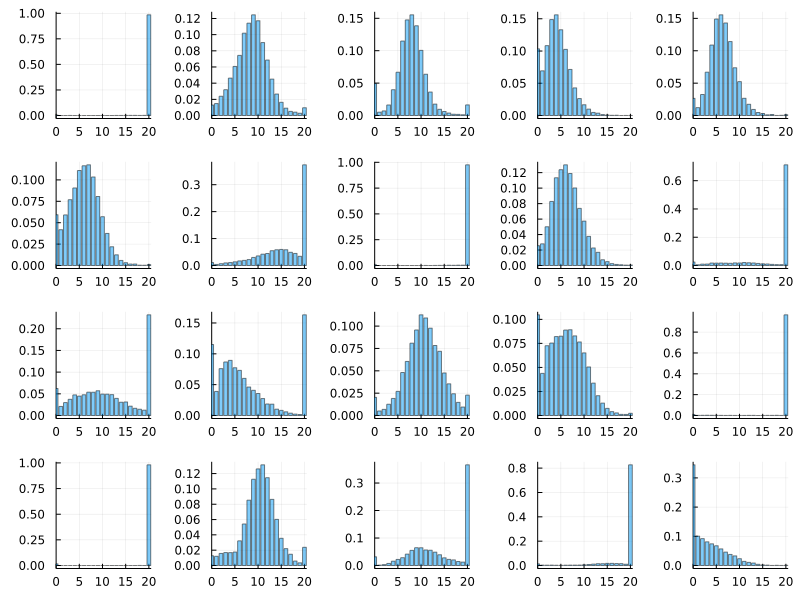

In [137]:
using Plots
state = 1
pl = map(1:20) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histo((@view statscau[:, k, state]), up=M.T), alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="cau", legend=false);
    #bar!(p, 0:M.T/20:M.T, histo((@view stats[:, k, state]), up=M.T),    alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="true", legend=false);
end;
plot(pl..., size=(800,600))

## Marginals and ROC curve

In [138]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum( stats[:,i,2] .< t .< stats[:,i,3] ) / numsamp
end

function tpr(xtrue, rank) 
    den = sum(xtrue[rank])
    if den != 0
        return cumsum(xtrue[rank]) ./ den
    else
        return ones(size(rank))
    end
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

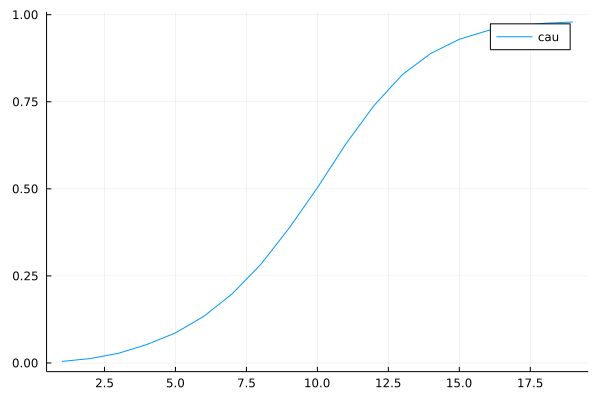

In [139]:
using Plots
p_cau = zeros(N,Int(T))
p_exact = zeros(N,Int(T))
for i = 1:N
    for t = 1:Int(T)
       p_cau[i,t] = marginal(i, t, statscau)
       #p_exact[i,t] = marginal(i, t, stats)
    end
end
i = 2
plot(p_cau[i,1:end-1], label = "cau")
#plot!(p_exact[i,1:end-1], label = "post")

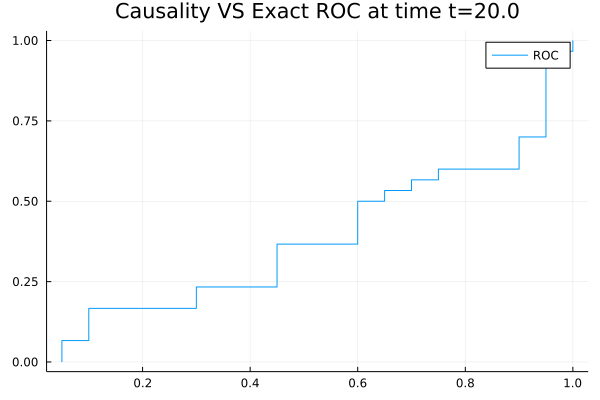

In [140]:
#Let us find the ROC of the infected individuals at time t
t = T
epidemic_risk=zeros(N)
true_risk=zeros(N)
for i=1:N
   epidemic_risk[i] = marginal(i,t,statscau)
   #true_risk[i] = marginal(i,t,stats)
end
xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
plot(ROC(xt, epidemic_risk)[1],ROC(xt, epidemic_risk)[2], label="ROC", title="Causality VS Exact ROC at time t=$t")
#plot!(ROC(xt, true_risk)[1],ROC(xt, true_risk)[2], label="exactROC")

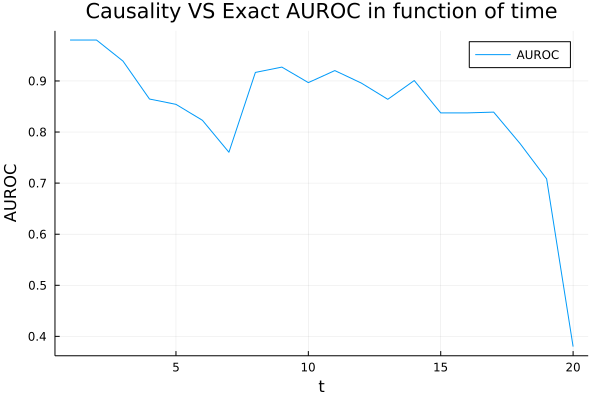

In [142]:
T = Int(T)
AU_curve=zeros(T)
AU_exact=zeros(T)
for t = 1:T
    epidemic_risk=zeros(N)
    true_risk=zeros(N)
    for i=1:N
       epidemic_risk[i] = marginal(i,t,statscau)
      # true_risk[i] = marginal(i,t,stats)
    end
    xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
    AU_curve[t] = AUROC(ROC(xt, epidemic_risk))
    #AU_exact[t] = AUROC(ROC(xt, true_risk))
end

plot(LinRange(1,T,T),AU_curve, label="AUROC", title="Causality VS Exact AUROC in function of time")
#plot!(LinRange(1,T,T),AU_exact, label="AUexact")
T = Float64(T)
#savefig("SEIR_AUROC.pdf")
xlabel!("t")
ylabel!("AUROC")